**to annotate and draw the gene region annotations of the new hotspots derived from LLM finetuned to logFC>1, FDR < 0.05**

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ref_df=pd.read_csv('/cellar/users/yumei/Documents/nlp_mRNA/pre-training_data/mouse_ensembl_cdna_052523/Ensembl_mouse_mRNA_cdna_5utr_3utr.csv')
#print (df)

In [3]:
#if looking at the column "5' UTR sequences," if it's not "Sequenceunavailable," then "5' UTR start" will be 1 and "5' UTR end" will be "5UTR length"

# Assuming your DataFrame is named df

# Create the '5' UTR start' column
ref_df["5' UTR start"] = ref_df["5UTR sequences"].apply(lambda x: 1 if x != 'Sequenceunavailable' else None)

# Create the '5' UTR end' column
ref_df["5' UTR end"] = ref_df.apply(lambda row: row["5UTR length"] if row["5UTR sequences"] != 'Sequenceunavailable' else None, axis=1)


# Create the 'CDS start' column by looking at "5'UTR" and seeing if it is "Sequenceunavailable". If it is not, then take the value in 5UTR length and add 1 and put that value in "CDS start"

# Create the 'CDS start' column
ref_df["CDS start"] = ref_df.apply(lambda row: 1 if row["5UTR sequences"] == 'Sequenceunavailable' else (row["5UTR length"] + 1), axis=1)

# Display the first few rows of the DataFrame to confirm the changes
#print(df.head())

# Create the 'CDS end' column
ref_df["CDS end"] = ref_df.apply(lambda row: row["cdna length"]-row['3UTR length'] if row["cdna sequences"] != 'Sequenceunavailable' else None, axis=1)


# Create the '3' UTR' column
ref_df["3'UTR start"] = ref_df.apply(lambda row: row["cdna length"] -row['3UTR length']+ 1 if row["3UTR sequences"] != 'Sequenceunavailable' else None, axis=1)

# Create the '3' UTR' column
ref_df["3'UTR end"] = ref_df.apply(lambda row: row["cdna length"] if row["cdna sequences"] != 'Sequenceunavailable' else None, axis=1)


# Display the first few rows of the DataFrame to confirm the changes
print(ref_df)


                  trans_id  index_df1 symbols_df1         gene_id_df1  \
0       ENSMUST00000000001         13       Gnai3  ENSMUSG00000000001   
1       ENSMUST00000000003         11        Pbsn  ENSMUSG00000000003   
2       ENSMUST00000000010         18       Hoxb9  ENSMUSG00000020875   
3       ENSMUST00000000028          9       Cdc45  ENSMUSG00000000028   
4       ENSMUST00000000033          7        Igf2  ENSMUSG00000048583   
...                    ...        ...         ...                 ...   
149438  ENSMUST00020183809     145437      Dicer1  ENSMUSG00000041415   
149439  ENSMUST00020183810     147810      Atp2b2  ENSMUSG00000030302   
149440  ENSMUST00020183811     148953        Bub1  ENSMUSG00000027379   
149441  ENSMUST00020183812     147874       Gon4l  ENSMUSG00000054199   
149442  ENSMUST00020183813     149442      Dicer1  ENSMUSG00000041415   

            gene_types                                     cdna sequences  \
0       protein_coding  CACACATCCGGTTCTTCCGGGA

In [4]:
deletion_df=pd.read_csv('/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/deletion_effects_threshold_1_30_nucleotides.csv', index_col=[0])
print (deletion_df)

                    deletion_index_start  deletion_index_end  difference  \
transcript_id                                                              
ENSMUST00000000001                     0                  30    0.001099   
ENSMUST00000000001                    15                  45    0.001587   
ENSMUST00000000001                    30                  60   -0.001343   
ENSMUST00000000001                    45                  75   -0.001099   
ENSMUST00000000001                    60                  90    0.002197   
...                                  ...                 ...         ...   
ENSMUST00020183810                   540                 570    0.003906   
ENSMUST00020183810                   555                 585    0.003906   
ENSMUST00020183810                   570                 600    0.003906   
ENSMUST00020183810                   585                 615    0.003906   
ENSMUST00020183810                   600                 630    0.003906   

           

In [5]:
#annotate the prediction df with gene names and then annotate with gene regions
enrich_df=pd.read_csv('/cellar/users/yumei/Documents/nlp_mRNA/experimental_RNAseq_analysis/all_brain_analysis/all_regions_output/P2_RNAseq/112923_CortexP2_SynapsevsLysate_isoforms.csv')

# Rename the first column to 'transcript_id'
enrich_df.rename(columns={'Unnamed: 0': 'transcript_id'}, inplace=True)

# Now the DataFrame df has the first column renamed to 'transcript_id'
print(enrich_df.head())

        transcript_id     logFC    logCPM           F        PValue  \
0  ENSMUST00000000001  0.185003  4.998304    8.070952  6.517739e-03   
1  ENSMUST00000000033  1.682594  6.678493   23.816011  1.148210e-05   
2  ENSMUST00000000058  1.220562  4.816764  192.894125  1.103678e-18   
3  ENSMUST00000000080 -0.545481  5.287142   23.768801  1.167351e-05   
4  ENSMUST00000000087 -0.100282  3.923625    0.606275  4.399081e-01   

            FDR external_gene_name  
0  1.161081e-02              Gnai3  
1  3.031792e-05               Igf2  
2  1.102172e-17               Cav2  
3  3.077891e-05               Klf6  
4  5.157092e-01              Scmh1  


In [6]:
# Merge the dataframes
named_df = pd.merge(deletion_df, enrich_df, on='transcript_id', how='inner')
print (named_df)

              transcript_id  deletion_index_start  deletion_index_end  \
0        ENSMUST00000000001                     0                  30   
1        ENSMUST00000000001                    15                  45   
2        ENSMUST00000000001                    30                  60   
3        ENSMUST00000000001                    45                  75   
4        ENSMUST00000000001                    60                  90   
...                     ...                   ...                 ...   
5722825  ENSMUST00020183810                   540                 570   
5722826  ENSMUST00020183810                   555                 585   
5722827  ENSMUST00020183810                   570                 600   
5722828  ENSMUST00020183810                   585                 615   
5722829  ENSMUST00020183810                   600                 630   

         difference  synapse_probability     logFC    logCPM           F  \
0          0.001099             0.030640  0.185

In [7]:
# Merge the two dataframes on the transcript_id column
merged_df = ref_df.merge(named_df, left_on='trans_id', right_on='transcript_id', how='inner')

# Define a function to determine the region of the deletion start index
def determine_start_region(row):
    if pd.notna(row["5' UTR start"]) and row["deletion_index_start"] <= row["5' UTR end"]:
        return "5' UTR"
    elif pd.notna(row["CDS start"]) and row["deletion_index_start"] >= row["CDS start"] and row["deletion_index_start"] <= row["CDS end"]:
        return "CDS"
    elif pd.notna(row["3'UTR start"]) and row["deletion_index_start"] >= row["3'UTR start"]:
        return "3' UTR"
    else:
        return "Unknown"

# Apply the function to each row of the merged dataframe
merged_df['deletion start region'] = merged_df.apply(determine_start_region, axis=1)


In [8]:
# Define a function to determine the region of the deletion start index
def determine_stop_region(row):
    if pd.notna(row["5' UTR start"]) and row["deletion_index_end"] <= row["5' UTR end"]:
        return "5' UTR"
    elif pd.notna(row["CDS start"]) and row["deletion_index_end"] >= row["CDS start"] and row["deletion_index_start"] <= row["CDS end"]:
        return "CDS"
    elif pd.notna(row["3'UTR start"]) and row["deletion_index_end"] >= row["3'UTR start"]:
        return "3' UTR"
    else:
        return "Unknown"

# Apply the function to each row of the merged dataframe
merged_df['deletion stop region'] = merged_df.apply(determine_stop_region, axis=1)


In [9]:
print (merged_df.head())

             trans_id  index_df1 symbols_df1         gene_id_df1  \
0  ENSMUST00000000001         13       Gnai3  ENSMUSG00000000001   
1  ENSMUST00000000001         13       Gnai3  ENSMUSG00000000001   
2  ENSMUST00000000001         13       Gnai3  ENSMUSG00000000001   
3  ENSMUST00000000001         13       Gnai3  ENSMUSG00000000001   
4  ENSMUST00000000001         13       Gnai3  ENSMUSG00000000001   

       gene_types                                     cdna sequences  \
0  protein_coding  CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...   
1  protein_coding  CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...   
2  protein_coding  CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...   
3  protein_coding  CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...   
4  protein_coding  CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...   

   cdna length                                     5UTR sequences  \
0         3262  CACACATCCGGTTCTTCCGGGAGCTAGGGGAGCTGACGGAGAAGGC...   
1         3262  CACA

In [10]:
# Remove columns that have "sequences" in the column name
abb_df = merged_df[[col for col in merged_df.columns if 'sequences' not in col]]

# List of columns to be removed
columns_to_remove = ['transcript_id', "index_df1", "index_df2", "symbols_df1", "symbols_df2", "F", "PValue", "gene_id_df2"]

# Remove the columns
abb_df.drop(columns=columns_to_remove, inplace=True)


# Display the DataFrame to confirm the columns have been removed
print(abb_df.head())

             trans_id         gene_id_df1      gene_types  cdna length  \
0  ENSMUST00000000001  ENSMUSG00000000001  protein_coding         3262   
1  ENSMUST00000000001  ENSMUSG00000000001  protein_coding         3262   
2  ENSMUST00000000001  ENSMUSG00000000001  protein_coding         3262   
3  ENSMUST00000000001  ENSMUSG00000000001  protein_coding         3262   
4  ENSMUST00000000001  ENSMUSG00000000001  protein_coding         3262   

   5UTR length  3UTR length  5' UTR start  5' UTR end  CDS start  CDS end  \
0          141         2056           1.0       141.0        142     1206   
1          141         2056           1.0       141.0        142     1206   
2          141         2056           1.0       141.0        142     1206   
3          141         2056           1.0       141.0        142     1206   
4          141         2056           1.0       141.0        142     1206   

   ...  deletion_index_start  deletion_index_end  difference  \
0  ...                     0

/tmp/ipykernel_2127858/523296798.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abb_df.drop(columns=columns_to_remove, inplace=True)


In [21]:
abb_df.to_csv('/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/30nt_annotation_occlusion_map_gene_regions_allseqs_notfiltered.csv')

In [11]:
#filter for synapse transcripts, as defined by logFC>1 and FDR <0.05
synapse_df=pd.read_csv('/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/synapse_trans_threshold_1.csv', index_col=[0])
print (synapse_df)
synapse_trans=synapse_df['synapse_transcript_id'].tolist()

     synapse_transcript_id
0       ENSMUST00000024757
1       ENSMUST00000148226
2       ENSMUST00000113615
3       ENSMUST00000017946
4       ENSMUST00000180235
...                    ...
4574    ENSMUST00000045593
4575    ENSMUST00000088585
4576    ENSMUST00000110737
4577    ENSMUST00000024963
4578    ENSMUST00000166247

[4579 rows x 1 columns]


In [12]:
filtered_df = abb_df[abb_df['trans_id'].isin(synapse_trans)]
print (filtered_df)

                   trans_id         gene_id_df1      gene_types  cdna length  \
216      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
217      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
218      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
219      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
220      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
...                     ...                 ...             ...          ...   
5722825  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722826  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722827  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722828  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722829  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   

         5UTR length  3UTR length  5' U

In [24]:
#write csv to file:
filtered_df.to_csv('/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/30nt_annotation_occlusion_map_gene_regions_synapse_transcripts_logFC1.csv')

In [13]:
filtered_df=filtered_df.rename(columns={"3'UTR start": "3' UTR start"})

In [14]:
print (filtered_df.columns)

Index(['trans_id', 'gene_id_df1', 'gene_types', 'cdna length', '5UTR length',
       '3UTR length', '5' UTR start', '5' UTR end', 'CDS start', 'CDS end',
       '3' UTR start', '3'UTR end', 'deletion_index_start',
       'deletion_index_end', 'difference', 'synapse_probability', 'logFC',
       'logCPM', 'FDR', 'external_gene_name', 'deletion start region',
       'deletion stop region'],
      dtype='object')


In [15]:

filtered_df['CDS length']=filtered_df['CDS end']-filtered_df['CDS start']


In [16]:
print (filtered_df)

                   trans_id         gene_id_df1      gene_types  cdna length  \
216      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
217      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
218      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
219      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
220      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
...                     ...                 ...             ...          ...   
5722825  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722826  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722827  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722828  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722829  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   

         5UTR length  3UTR length  5' U

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_diff_norm_gene(gene_region, deletion_df, region_length, color):
    # ... (rest of the function remains the same):
    # Set global font size
    
    #plt.rcParams['pdf.fonttype'] = 42
    #plt.rcParams.update({'font.size': 18})
    plt.rcParams['svg.fonttype'] = 'none'

    # Filter the dataframe for the specific gene region
    region_df = deletion_df[(deletion_df['deletion start region'] == gene_region) & (deletion_df['deletion stop region'] == gene_region)]
    
    # Normalize the deletion start index to each transcript's cDNA length
    region_start_column = f"{gene_region} start"

    # Conditional filter for '5' UTR'
    if gene_region == "5' UTR":
        region_df = region_df[region_df['deletion_index_start'] >= region_df[region_start_column]]

    region_df['normalized_deletion_start'] = (region_df['deletion_index_start'] - region_df[region_start_column]) / region_df[region_length]
    print(region_df)
    
    # Save the filtered and processed data to CSV
    region_df.to_csv(f'/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/normalized_index_start_{gene_region}.csv')

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.scatter(region_df['normalized_deletion_start'], region_df['difference'], marker='o', c=color, edgecolor='black', linewidth=0.5)
    plt.xlabel('Normalized Deletion Start Index', fontsize=18)
    plt.ylabel('Effect of Occlusion', fontsize=18)
    plt.ylim(-1, 1)
    #plt.title(f'Difference Magnitude vs. Normalized Deletion Start Index for {gene_region}', fontsize=22)
    #plt.grid(False, linestyle='--', linewidth=0.5)
    
    # Save the figure
    plt.savefig(f'/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/all_synapse_{gene_region}_deletion_figure.svg')
    plt.savefig(f'/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/all_synapse_{gene_region}_occlusion_plot.jpeg')
    plt.savefig(f'/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/all_synapse_{gene_region}_occlusion_plot.pdf')
    
    plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_diff_norm_gene(gene_region, deletion_df, region_length, color):
    # Set global font size and vector-friendly font for PDF
    plt.rcParams['pdf.fonttype'] = 42  # Ensure text remains editable
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams.update({'font.size': 18})

    # Filter the dataframe for the specific gene region
    region_df = deletion_df[(deletion_df['deletion start region'] == gene_region) & 
                            (deletion_df['deletion stop region'] == gene_region)]
    
    # Normalize the deletion start index to each transcript's cDNA length
    region_start_column = f"{gene_region} start"

    # Conditional filter for '5' UTR'
    if gene_region == "5' UTR":
        region_df = region_df[region_df['deletion_index_start'] >= region_df[region_start_column]]

    region_df['normalized_deletion_start'] = (region_df['deletion_index_start'] - region_df[region_start_column]) / region_df[region_length]
    print(region_df)
    
    # Save the filtered and processed data to CSV
    region_df.to_csv(f'/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/normalized_index_start_{gene_region}.csv')

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.scatter(
        region_df['normalized_deletion_start'],
        region_df['difference'],
        marker='o',
        c=color,
        edgecolor='black',
        linewidth=0.5,
        rasterized=True  # Rasterize the points to simplify the PDF
    )
    plt.xlabel('Normalized Deletion Start Index', fontsize=18)
    plt.ylabel('Effect of Occlusion', fontsize=18)
    plt.ylim(-1, 1)
    
    # Save the figure
    plt.savefig(f'/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/all_synapse_{gene_region}_deletion_figure.svg', format='svg')
    plt.savefig(f'/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/all_synapse_{gene_region}_occlusion_plot.jpeg', format='jpeg', dpi=300)
    plt.savefig(f'/cellar/users/yumei/Documents/nlp_mRNA/motif_analysis/30_nt_graphs/all_synapse_{gene_region}_occlusion_plot.pdf', format='pdf', dpi=300)
    
    plt.show()


                   trans_id         gene_id_df1      gene_types  cdna length  \
217      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
218      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
219      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
220      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
221      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
...                     ...                 ...             ...          ...   
5718734  ENSMUST00000239510  ENSMUSG00000118664  protein_coding         1264   
5718735  ENSMUST00000239510  ENSMUSG00000118664  protein_coding         1264   
5718736  ENSMUST00000239510  ENSMUSG00000118664  protein_coding         1264   
5718737  ENSMUST00000239510  ENSMUSG00000118664  protein_coding         1264   
5718738  ENSMUST00000239510  ENSMUSG00000118664  protein_coding         1264   

         5UTR length  3UTR length  5' U

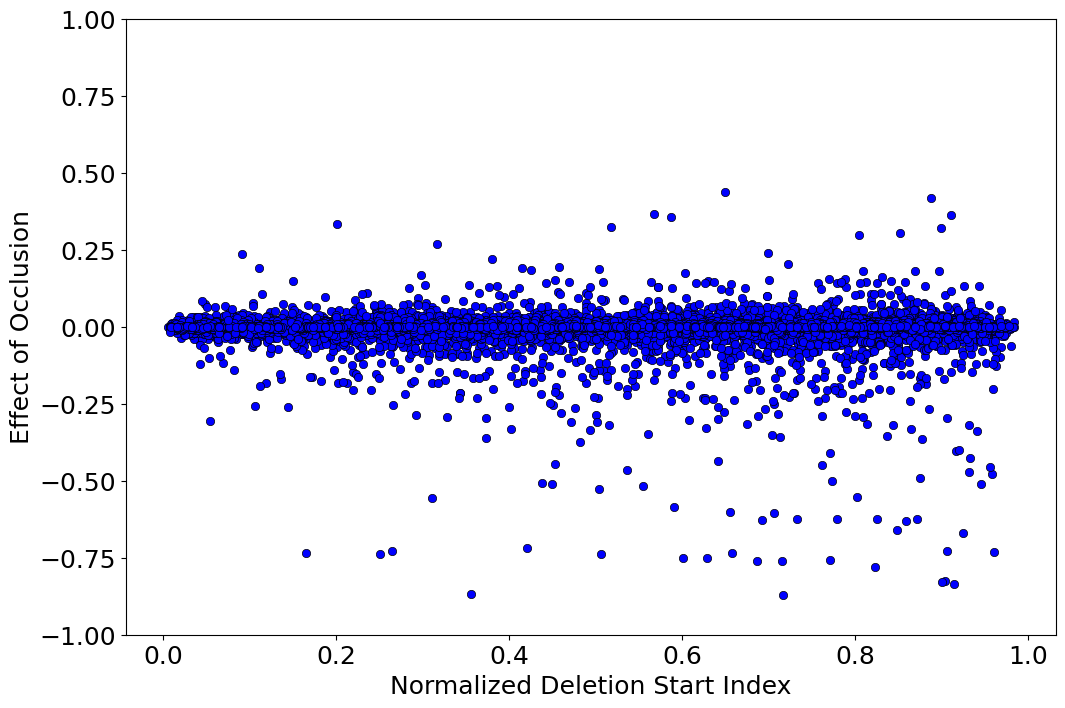

In [18]:
plot_diff_norm_gene("5' UTR", filtered_df, '5UTR length', 'blue')

/tmp/ipykernel_2127858/3985402076.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['normalized_deletion_start'] = (region_df['deletion_index_start'] - region_df[region_start_column]) / region_df[region_length]


                   trans_id         gene_id_df1      gene_types  cdna length  \
224      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
225      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
226      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
227      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
228      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
...                     ...                 ...             ...          ...   
5722809  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722810  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722811  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722812  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722813  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   

         5UTR length  3UTR length  5' U

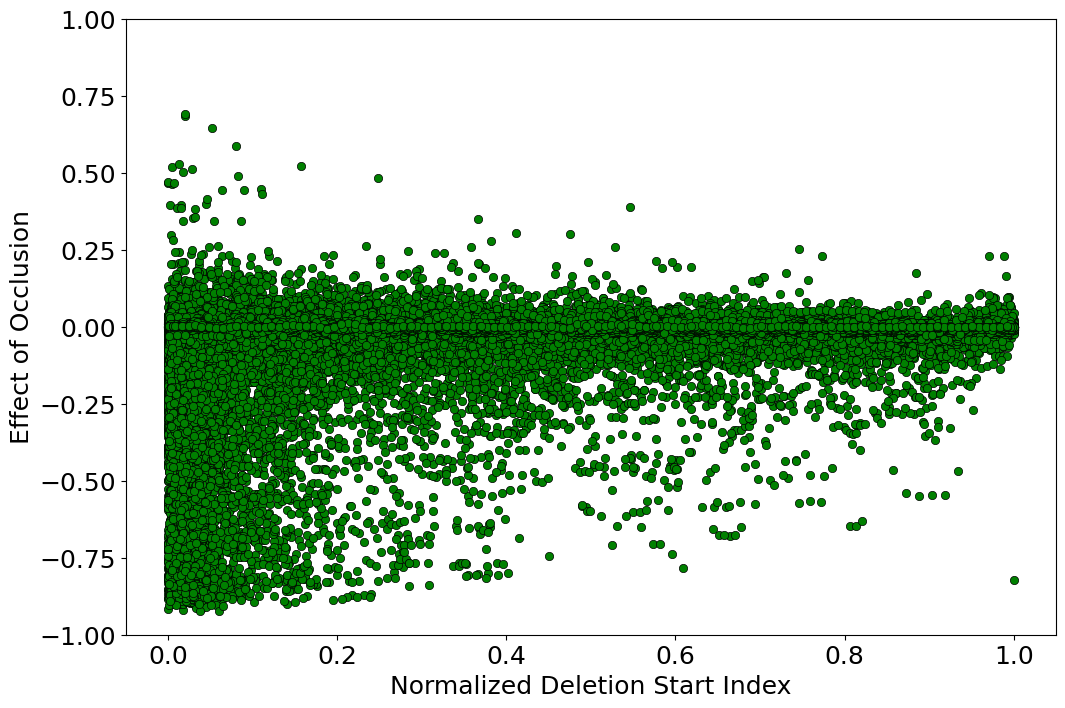

In [19]:
plot_diff_norm_gene("CDS", filtered_df, 'CDS length', 'green')


/tmp/ipykernel_2127858/3985402076.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['normalized_deletion_start'] = (region_df['deletion_index_start'] - region_df[region_start_column]) / region_df[region_length]


                   trans_id         gene_id_df1      gene_types  cdna length  \
260      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
261      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
262      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
263      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
264      ENSMUST00000000033  ENSMUSG00000048583  protein_coding         3708   
...                     ...                 ...             ...          ...   
5722825  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722826  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722827  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722828  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   
5722829  ENSMUST00020183810  ENSMUSG00000030302  protein_coding          637   

         5UTR length  3UTR length  5' U

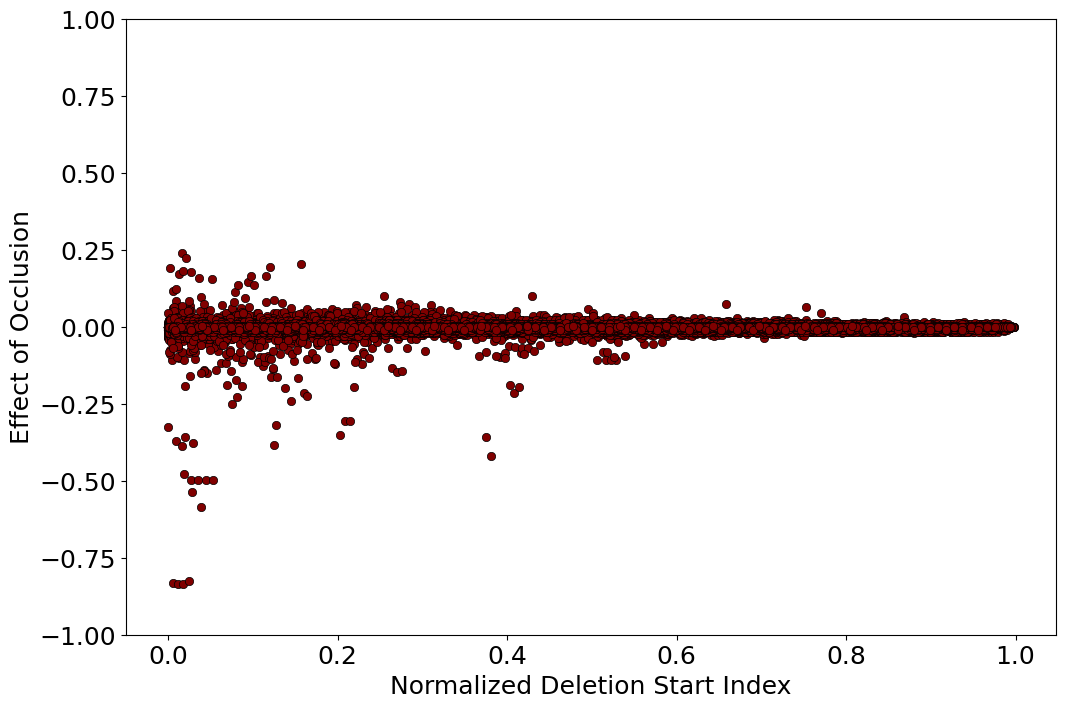

In [21]:
plot_diff_norm_gene("3' UTR", filtered_df, '3UTR length', 'maroon')
